# Creating baseline performance for MPI


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
#import hvplot.xarray
import sys

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sys.path.insert(0, '../../src')

from utils import df_to_xarray,read_xarray

In [77]:
mpi_data_path = "../../data/mpi_001"

dist_map = pd.read_csv("../../src/dist_map.csv",header=None).to_numpy()
dist_map = np.roll(np.fliplr(dist_map),180)
dist_map = np.repeat(dist_map[np.newaxis, :, : ], 421, axis=0)

def read_xarray_mpi(dir_name="",num="006"):
    '''
     read_xarray(dir)name) opens data and returns data in xarray format for each feature
    '''
    date="198201-201701"
  
    file_type ="MPI"
        
    chl = xr.open_dataset(f'{dir_name}/Chl_2D_mon_{file_type}{num}_1x1_{date}.nc')

    mld = xr.open_dataset(f'{dir_name}/MLD_2D_mon_{file_type}{num}_1x1_{date}.nc')

    sss = xr.open_dataset(f'{dir_name}/SSS_2D_mon_{file_type}{num}_1x1_{date}.nc')

    sst = xr.open_dataset(f'{dir_name}/SST_2D_mon_{file_type}{num}_1x1_{date}.nc')

    xco2 = xr.open_dataset(f'../../data/member_001/XCO2_1D_mon_CESM001_native_198201-201701.nc')

    pco2 = xr.open_dataset(f'{dir_name}/pCO2_2D_mon_{file_type}{num}_1x1_{date}.nc')

    return chl,mld,sss,sst,xco2,pco2


chl,mld,sss,sst,xco2,pco2 = read_xarray_mpi(mpi_data_path)
xco2['time'] = xco2.indexes['time'].to_datetimeindex().strftime("%Y-%m")

/tmp/ipykernel_3631604/479448007.py:31: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  xco2['time'] = xco2.indexes['time'].to_datetimeindex().strftime("%Y-%m")


In [121]:
xco2_df = pd.DataFrame()
xco2_df["XCO2"] = xco2.XCO2
xco2_df.index = xco2.time

data_read=xr.merge([mld.MLD,mld.MLD_socat,chl.Chl,chl.Chl_socat,sst.SST,sst.SST_socat,sss.SSS,sss.SSS_socat])

tmp_data=data_read.to_dataframe().reset_index()
tmp_data["time"] = tmp_data["time"].dt.strftime("%Y-%m")

In [122]:
later_df = tmp_data
later_df = later_df.set_index(['time','ylat','xlon'])
pco2_data = pco2.pCO2.to_dataframe()
pco2_data_socat = pco2.pCO2_socat.to_dataframe()
later_df["pCO2_socat"]=pco2_data_socat["pCO2_socat"]
later_df["pCO2"]=pco2_data["pCO2"]

building tree 4 of 20
building tree 7 of 20
building tree 11 of 20
building tree 15 of 20
building tree 19 of 20
building tree 3 of 20
building tree 5 of 20
building tree 9 of 20
building tree 13 of 20
building tree 17 of 20
building tree 1 of 20
building tree 6 of 20
building tree 11 of 20
building tree 15 of 20
building tree 19 of 20
building tree 3 of 20
building tree 5 of 20
building tree 9 of 20
building tree 13 of 20
building tree 17 of 20
building tree 1 of 20
building tree 7 of 20
building tree 11 of 20
building tree 15 of 20
building tree 19 of 20
building tree 3 of 20
building tree 5 of 20
building tree 11 of 20
building tree 14 of 20
building tree 19 of 20
building tree 1 of 20
building tree 6 of 20
building tree 10 of 20
building tree 14 of 20
building tree 18 of 20
building tree 2 of 20
building tree 8 of 20
building tree 12 of 20
building tree 16 of 20
building tree 20 of 20
building tree 4 of 20
building tree 7 of 20
building tree 10 of 20
building tree 13 of 20
building

In [ ]:
tmp_data = xco2_df.join(tmp_data.set_index('time'),how = "right")
tmp_data.dropna(subset = ["XCO2"], inplace=True)
tmp_data = tmp_data.reset_index()

In [ ]:
tmp_data.columns = ["time",'XCO2','xlon', 'ylat','MLD','MLD_socat','Chl','Chl_socat','SST','SST_socat','SSS','SSS_socat']

In [93]:
tmp_data.dropna(subset = ["Chl"], inplace=True)

index               0
time                0
XCO2                0
xlon                0
ylat                0
MLD                 0
MLD_socat           0
Chl                 0
Chl_socat           0
SST                 0
SST_socat           0
SSS                 0
SSS_socat           0
pCO2_socat    6541080
pCO2          6541080
dtype: int64

In [95]:
pco2_data = pco2.pCO2.to_dataframe().reset_index()
pco2_data_socat = pco2.pCO2_socat.to_dataframe().reset_index()

tmp_data["pCO2_socat"]=pco2_data_socat["pCO2_socat"]
tmp_data["pCO2"]=pco2_data["pCO2"]
tmp_data=tmp_data.dropna(subset = ["pCO2"])

In [97]:
tmp_data.isna().sum()

index         0
time          0
XCO2          0
xlon          0
ylat          0
MLD           0
MLD_socat     0
Chl           0
Chl_socat     0
SST           0
SST_socat     0
SSS           0
SSS_socat     0
pCO2_socat    0
pCO2          0
dtype: int64

In [98]:
time = tmp_data.time

In [107]:

features_socat = ['xlon', 'ylat','MLD_socat', 'SST_socat', 'SSS_socat','Chl_socat', 'XCO2','pCO2_socat']
features = ['xlon', 'ylat','MLD','SST','SSS','Chl','XCO2','pCO2']

# features_socat = ['xlon', 'ylat', 'SST_socat', 'SSS_socat','Chl_socat', 'XCO2','pCO2_socat']
# features = ['xlon', 'ylat','SST','SSS','Chl','XCO2','pCO2']



# create separate dataframe for socat
combined_socat=tmp_data[features_socat]
combined=tmp_data[features]

In [108]:
X_socat=combined_socat.iloc[:,:-1]
X=combined.iloc[:,:-1]
y=combined.loc[:,'pCO2']
y_socat=combined_socat.loc[:,'pCO2_socat']

In [109]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X=imp.fit_transform(X)
X_socat=imp.fit_transform(X_socat)

In [198]:

X_train, X_test, y_train, y_test = train_test_split(X_socat, y_socat, test_size=0.3, random_state= 73)

regressor=RandomForestRegressor(n_estimators=20, random_state=42, verbose=3,n_jobs=-1, 
                                max_depth=10,warm_start= True)
regressor.fit(X_train, y_train)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

forest_scores = cross_val_score(regressor, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20building tree 8 of 20

building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   51.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   51.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   48.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   48.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[P

Scores: [29.81164595 30.06978876 30.22313836]
Mean: 30.034857689390453
Standard deviation: 0.16979720524067302


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s finished


In [199]:
y_pred=regressor.predict(X_test)
test_mse=mean_squared_error(y_test, y_pred,squared=True)
np.sqrt(test_mse)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.0s finished


30.050552261315364

In [200]:
y_pred=regressor.predict(X)
final_test_rmse=np.sqrt(mean_squared_error(y, y_pred,squared=True))
error=y-y_pred

final_test_rmse

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.4s finished


348.3256412564924

In [201]:
## Full Data
# rmse with MLD : 40.462 uatm -> 31.9733 uatm
# rmse with Dist : 41.541 uatm -> 32.84 uatm with coordinate

## Socat 
# # rmse with MLD : on full  348.32 uatm with coordinate

In [202]:
#predicted_df = pd.DataFrame(X, columns = ['xlon', 'ylat','Chl','SST','SSS','XCO2'])
predicted_df = pd.DataFrame(X, columns = ['xlon', 'ylat','MLD','SST','SSS','Chl','XCO2'])
predicted_df["pred"] = y_pred
predicted_df["true"] = y.to_numpy()

In [203]:
time=time.reset_index(drop=True)

In [204]:
predicted_df["time"]= time.time
predicted_df = predicted_df.set_index(['time','ylat','xlon'])

In [205]:
new_df = later_df
row_ind = predicted_df.index
new_df.loc[row_ind,"pred"] = predicted_df["pred"]

In [206]:
new_df["res"] = new_df["pred"] - new_df["pCO2"]

In [207]:
new_df=new_df.reset_index()

In [208]:
col_names = ["time","lon","lat","pred"]
pred_df = new_df[["time","xlon","ylat","pred"]]
pred_df.columns = col_names
pred_df['time'] = pd.to_datetime(pred_df['time'])
pred_df = pred_df.set_index(["time","lat","lon"])

col_names = ["time","lon","lat","res"]

res_df = new_df[["time","xlon","ylat","res"]]
res_df.columns = col_names
res_df['time'] = pd.to_datetime(res_df['time'])
res_df = res_df.set_index(["time","lat","lon"])


pred_xarray = pred_df.to_xarray()
res_xarray = res_df.to_xarray()

/tmp/ipykernel_3631604/85856999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['time'] = pd.to_datetime(pred_df['time'])
/tmp/ipykernel_3631604/85856999.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['time'] = pd.to_datetime(res_df['time'])


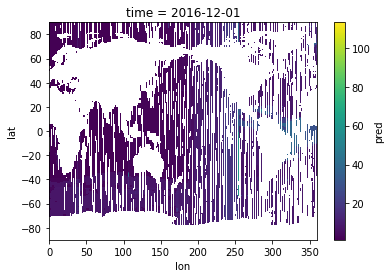

In [209]:
p1 = pred_xarray.pred[419].plot()
plt.savefig("../../assets/mpi_rf_pred_socat.jpg")

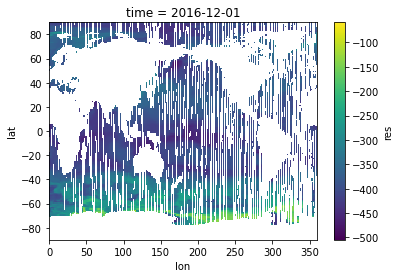

In [210]:
res_xarray.res[419].plot()
plt.savefig("../../assets/mpi_rf_res_socat.jpg")

/tmp/ipykernel_3631604/2119154728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df['time'] = pd.to_datetime(true_df['time'])


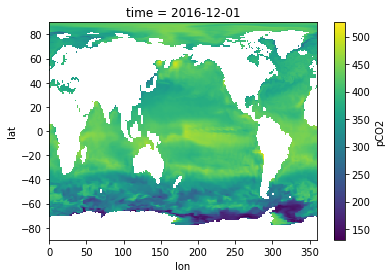

building tree 1 of 20
building tree 8 of 20
building tree 12 of 20
building tree 16 of 20
building tree 20 of 20
building tree 4 of 20
building tree 8 of 20
building tree 12 of 20
building tree 16 of 20
building tree 18 of 20
building tree 3 of 20
building tree 5 of 20
building tree 11 of 20
building tree 16 of 20
building tree 19 of 20
building tree 3 of 20
building tree 5 of 20
building tree 9 of 20
building tree 13 of 20
building tree 17 of 20
building tree 1 of 20
building tree 6 of 20
building tree 9 of 20
building tree 13 of 20
building tree 17 of 20
building tree 1 of 20
building tree 6 of 20
building tree 9 of 20
building tree 14 of 20
building tree 17 of 20
building tree 2 of 20
building tree 6 of 20
building tree 11 of 20
building tree 14 of 20
building tree 18 of 20
building tree 3 of 20
building tree 5 of 20
building tree 11 of 20
building tree 15 of 20
building tree 20 of 20
building tree 4 of 20
building tree 8 of 20
building tree 12 of 20
building tree 15 of 20
building 

In [211]:
col_names = ["time","lon","lat","pCO2"]
true_df = new_df[["time","xlon","ylat","pCO2"]]
true_df.columns = col_names
true_df['time'] = pd.to_datetime(true_df['time'])
true_df = true_df.set_index(["time","lat","lon"])


true_xarray = true_df.to_xarray()

true_xarray.pCO2[419].plot()